This is a notebook showing basic capabilities of the biomechZoo python toolbox

In [6]:
# import libraries
import os
from biomechzoo import BiomechZoo
from utils.engine import engine
from utils.zload import zload

In [10]:
# Step 0 get raw data folder and create an instance of biomechZoo class
project_root = os.getcwd()
fld_raw_data = os.path.join(project_root, 'data', 'sample_study', 'raw c3d files')
bmech = BiomechZoo(fld_raw_data, verbose='all')


BiomechZoo initialized
verbosity set to: all
processing folder set to: /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files
each processing step will be applied to a new folder


In [11]:
# step 1: convert c3d to zoo
bmech.c3d2zoo(out_folder='1-c3d2zoo')

converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC044A/Straight/HC044A15.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC044A/Turn/HC044A29.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC044A/Static/HC044A01.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC002D/Straight/HC002D06.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC002D/Turn/HC002D25.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC002D/Static/HC002D02.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC030A/Straight/HC030A05.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/HC030A/Turn/HC030A22.c3d
converting c3d to zoo for /Users/phild/Code/biomechzoo/data/sample_study/raw c3d files/H

In [12]:
# step 2: Remove channels not necessary for analysis
ch = ['RHipAngles', 'RKneeAngles', 'RAnkleAngles', 'SACR']
bmech.removechannel(ch, mode='keep',out_folder='2-removechannel')


removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC044A/Straight/HC044A15.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC044A/Turn/HC044A29.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC044A/Static/HC044A01.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC002D/Straight/HC002D06.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC002D/Turn/HC002D25.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC002D/Static/HC002D02.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC030A/Straight/HC030A05.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC030A/Turn/HC030A22.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/1-c3d2zoo/HC030A/Static/HC030A01.zoo
removing channels for /Users/phild/Code/biomec

In [13]:
# step 3: explode channels
bmech.explodechannel(out_folder='3-explodechannels')


removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC044A/Straight/HC044A15.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC044A/Turn/HC044A29.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC044A/Static/HC044A01.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC002D/Straight/HC002D06.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC002D/Turn/HC002D25.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC002D/Static/HC002D02.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC030A/Straight/HC030A05.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC030A/Turn/HC030A22.zoo
removing channels for /Users/phild/Code/biomechzoo/data/sample_study/2-removechannel/HC030A/Static/HC030

In [14]:
# step 4: normalize data
bmech.normalize(nlen=101, out_folder='4-normalize')

normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC044A/Straight/HC044A15.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC044A/Turn/HC044A29.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC044A/Static/HC044A01.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC002D/Straight/HC002D06.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC002D/Turn/HC002D25.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC002D/Static/HC002D02.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC030A/Straight/HC030A05.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_s

/Users/phild/Code/biomechzoo/biomech_ops/normalize_data.py:25: UserWarning: event data have not been normalized
  warnings.warn('event data have not been normalized')
/Users/phild/Code/biomechzoo/biomech_ops/normalize_data.py:29: UserWarning: zoosystem data have not been fully updated
  warnings.warn('zoosystem data have not been fully updated')


normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC055A/Straight/HC055A09.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC055A/Turn/HC055A34.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC055A/Static/HC055A01.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC033A/Straight/HC033A10.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC033A/Turn/HC033A22.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC033A/Static/HC033A01.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_study/3-explodechannels/HC040A/Straight/HC040A14.zoo
normalizing channels to length 101 for /Users/phild/Code/biomechzoo/data/sample_s

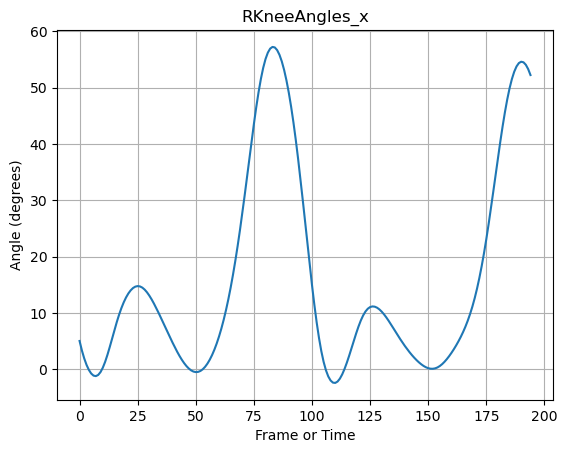

In [15]:
# let's plot a single zoo file using matplotlib
import matplotlib.pyplot as plt
fld = bmech.in_folder
fl = engine(fld, extension='.zoo',name_contains='HC032')[0]
data = zload(fl)
array_to_plot = data['RKneeAngles_x']['line']
plt.figure()
plt.plot(array_to_plot)
plt.title('RKneeAngles_x')
plt.xlabel('Frame or Time')
plt.ylabel('Angle (degrees)')
plt.grid(True)
plt.show()


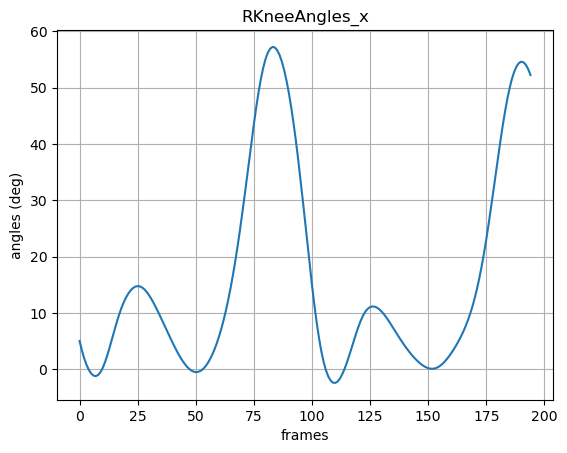

In [16]:
# let's plot at a single zoo using our zplot helper function
from utils.zplot import zplot
fld = bmech.in_folder
fl = engine(fld, extension='.zoo',name_contains='HC032')[0]
data = zload(fl)
zplot(data, 'RKneeAngles_x')